In [1]:
# Importing required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing dataset
# downloaded from kaggle and saved into a local drive

diabetes_df = pd.read_csv('diabetes_mainfile.csv')

In [3]:
# Data preview
# To display first 5 records 

diabetes_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
# To drop the column PatienID
# we removed the patientID column from the data set as it is of no use and a unique number

diabetes_df.drop("PatientID",axis=1,inplace=True)

In [5]:
# Dataset dimensions : to display number of rows and columns

diabetes_df.shape

(15000, 9)

In [6]:
# Features of the dataset

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
Pregnancies               15000 non-null int64
PlasmaGlucose             15000 non-null int64
DiastolicBloodPressure    15000 non-null int64
TricepsThickness          15000 non-null int64
SerumInsulin              15000 non-null int64
BMI                       15000 non-null float64
DiabetesPedigree          15000 non-null float64
Age                       15000 non-null int64
Diabetic                  15000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [7]:
# To see the statistical summary of our dataset 

diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,15000.0,3.224533,3.391020,0.000000,0.000000,2.000000,6.000000,14.000000
PlasmaGlucose,15000.0,107.856867,31.981975,44.000000,84.000000,104.000000,129.000000,192.000000
DiastolicBloodPressure,15000.0,71.220667,16.758716,24.000000,58.000000,72.000000,85.000000,117.000000
TricepsThickness,15000.0,28.814000,14.555716,7.000000,15.000000,31.000000,41.000000,93.000000
SerumInsulin,15000.0,137.852133,133.068252,14.000000,39.000000,83.000000,195.000000,799.000000
BMI,15000.0,31.509646,9.759000,18.200512,21.259887,31.767940,39.259692,56.034628
DiabetesPedigree,15000.0,0.398968,0.377944,0.078044,0.137743,0.200297,0.616285,2.301594
Age,15000.0,30.137733,12.089703,21.000000,22.000000,24.000000,35.000000,77.000000
Diabetic,15000.0,0.333333,0.471420,0.000000,0.000000,0.000000,1.000000,1.000000


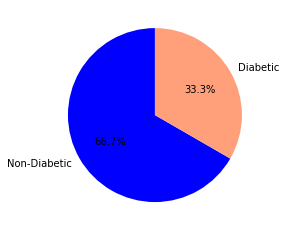

In [8]:
# Outcome countplot

# Plot to show the distribution of outcome variable Diabetic

colors=['blue', 'lightsalmon']
d0 = diabetes_df['Diabetic'] == 0
d1 = diabetes_df['Diabetic'] == 1
d0_set=diabetes_df[d0]
d1_set=diabetes_df[d1]
d0_count=d0_set["Diabetic"].count()

d1_count=d1_set["Diabetic"].count()
d_pie=[d0_count,d1_count]

names=["Non-Diabetic","Diabetic"]
plt.pie(d_pie, labels=names,colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

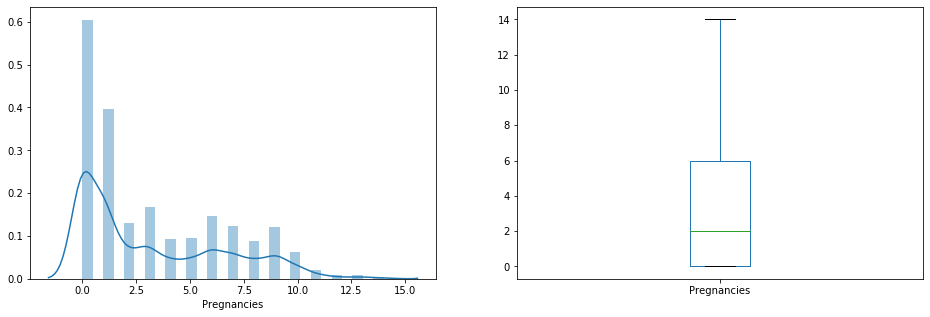

In [9]:
# To check the distribution of the independent variables 
# Distriburion of pregnancies

plt.figure(1)
plt.subplot(121),sns.distplot(diabetes_df["Pregnancies"])
plt.subplot(122),diabetes_df["Pregnancies"].plot.box(figsize=(16,5))
plt.show()


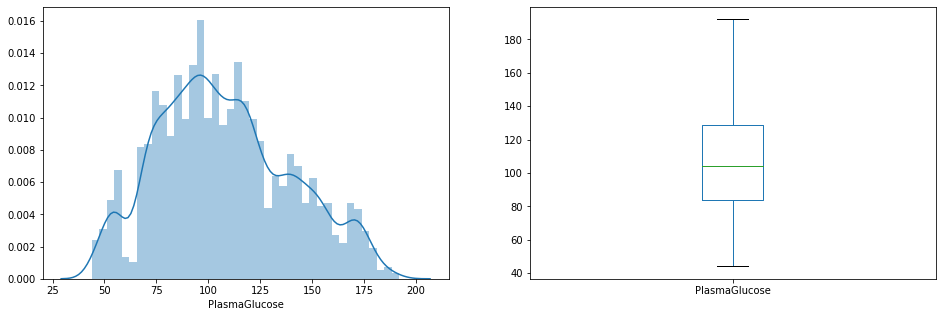

In [10]:
# Distriburion of PlasmaGlucose

plt.figure(1)
plt.subplot(121),sns.distplot(diabetes_df["PlasmaGlucose"])
plt.subplot(122),diabetes_df["PlasmaGlucose"].plot.box(figsize=(16,5))
plt.show()

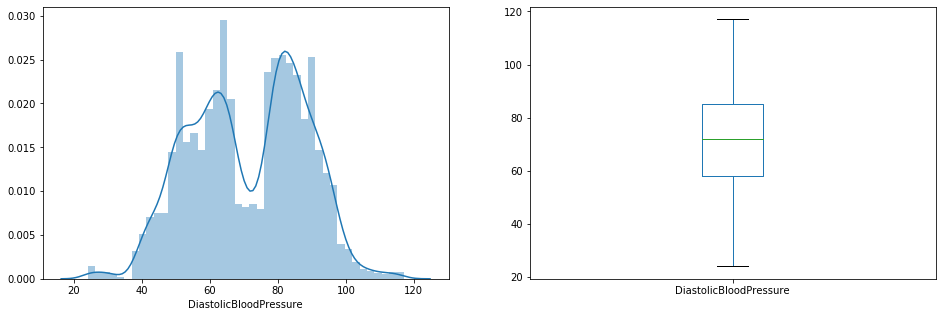

In [11]:
# Distriburion of DiastolicBloodPressure

plt.figure(1)
plt.subplot(121),sns.distplot(diabetes_df["DiastolicBloodPressure"])
plt.subplot(122),diabetes_df["DiastolicBloodPressure"].plot.box(figsize=(16,5))
plt.show()

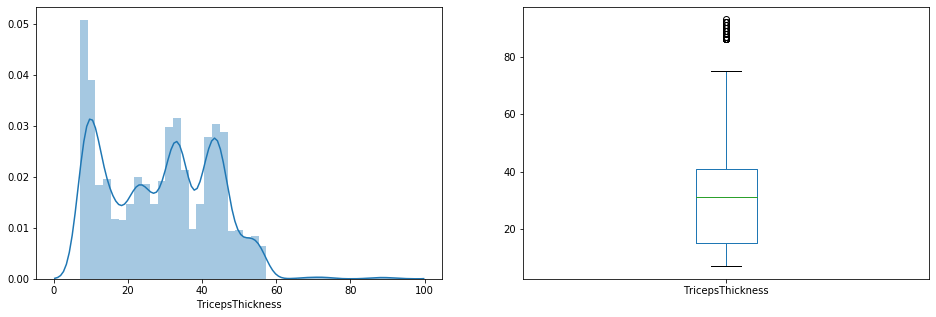

In [12]:
# Distriburion of TricepsThickness

plt.figure(1)
plt.subplot(121),sns.distplot(diabetes_df["TricepsThickness"])
plt.subplot(122),diabetes_df["TricepsThickness"].plot.box(figsize=(16,5))
plt.show()

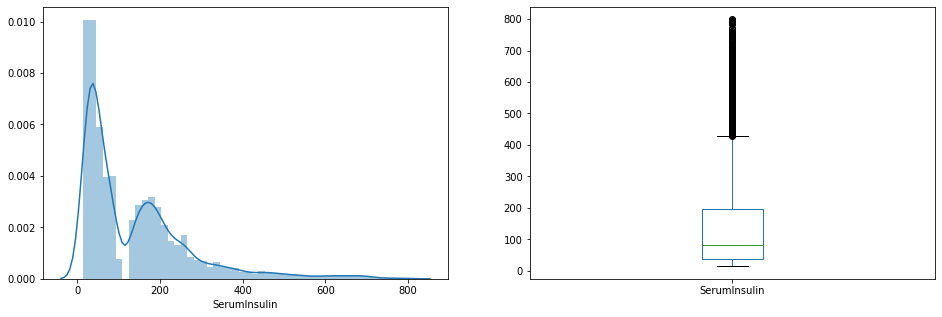

In [13]:
# Distriburion of SerumInsulin

plt.figure(1)
plt.subplot(121),sns.distplot(diabetes_df["SerumInsulin"])
plt.subplot(122),diabetes_df["SerumInsulin"].plot.box(figsize=(16,5))
plt.show()

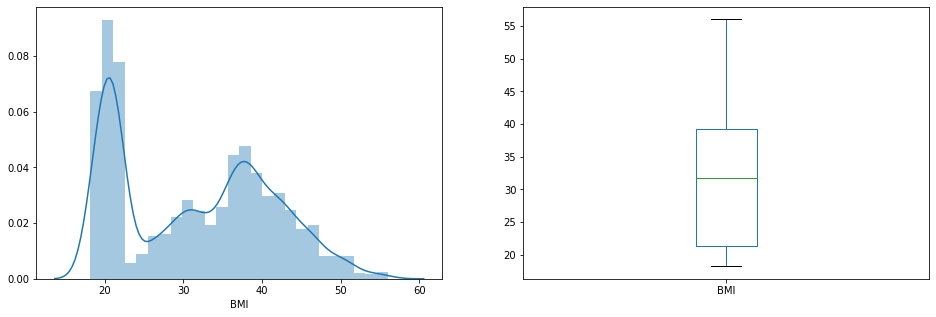

In [14]:
# Distriburion of BMI

plt.figure(1)
plt.subplot(121),sns.distplot(diabetes_df["BMI"])
plt.subplot(122),diabetes_df["BMI"].plot.box(figsize=(16,5))
plt.show()

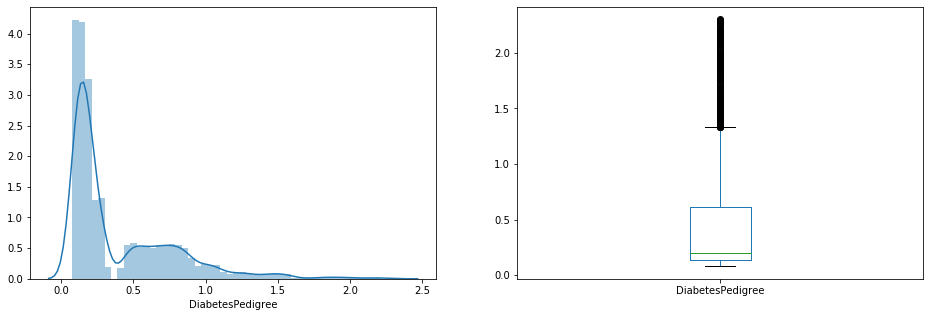

In [15]:
# Distriburion of DiabetesPedigree

plt.figure(1)
plt.subplot(121),sns.distplot(diabetes_df["DiabetesPedigree"])
plt.subplot(122),diabetes_df["DiabetesPedigree"].plot.box(figsize=(16,5))
plt.show()

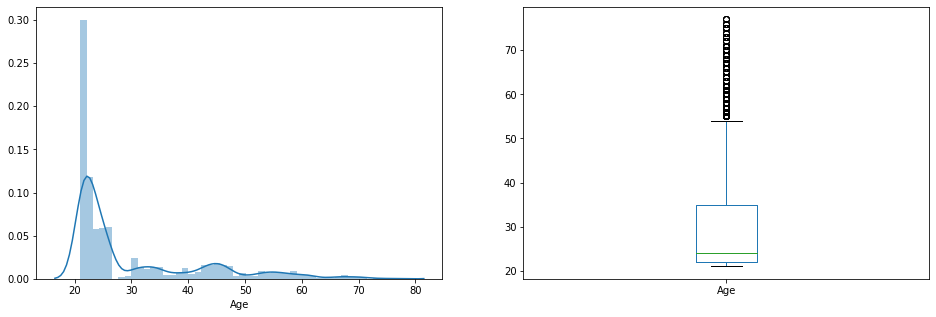

In [16]:
# Distriburion of Age

plt.figure(1)
plt.subplot(121),sns.distplot(diabetes_df["Age"])
plt.subplot(122),diabetes_df["Age"].plot.box(figsize=(16,5))
plt.show()

In [17]:
# To check if we have any null values

diabetes_df.isnull().sum()


# There are zero Nan values in  the dataset

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [18]:
# To check and display the number of rows with 0 values

print("Total number of rows: ", format(len(diabetes_df)))

print("Number of rows missing PlasmaGlucose: {0}",
     format(len(diabetes_df.loc[diabetes_df['PlasmaGlucose']==0])))

print("Number of rows missing DiastolicBloodPressure: {0}",
     format(len(diabetes_df.loc[diabetes_df['DiastolicBloodPressure']==0])))

print("Number of rows missing TricepsThickness: {0}",
     format(len(diabetes_df.loc[diabetes_df['TricepsThickness']==0])))

print("Number of rows missing SerumInsulin: {0}",
     format(len(diabetes_df.loc[diabetes_df['SerumInsulin']==0])))

print("Number of rows missing BMI: {0}",
     format(len(diabetes_df.loc[diabetes_df['BMI']==0])))

print("Number of rows missing DiabetesPedigree: {0}",
     format(len(diabetes_df.loc[diabetes_df['DiabetesPedigree']==0])))

print("Number of rows missing Age: {0}",
     format(len(diabetes_df.loc[diabetes_df['Age']==0])))

Total number of rows:  15000
Number of rows missing PlasmaGlucose: {0} 0
Number of rows missing DiastolicBloodPressure: {0} 0
Number of rows missing TricepsThickness: {0} 0
Number of rows missing SerumInsulin: {0} 0
Number of rows missing BMI: {0} 0
Number of rows missing DiabetesPedigree: {0} 0
Number of rows missing Age: {0} 0


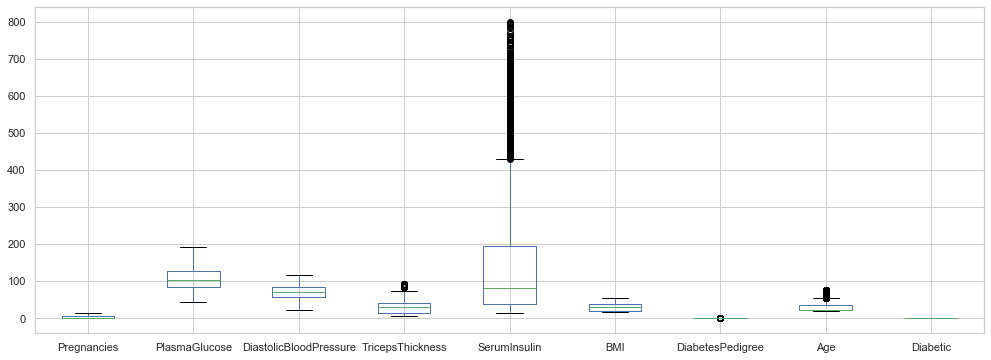

In [19]:
# To see box plots for outlier visualization in all variables at once

sns.set(style="whitegrid")
diabetes_df.boxplot(figsize=(17,6))

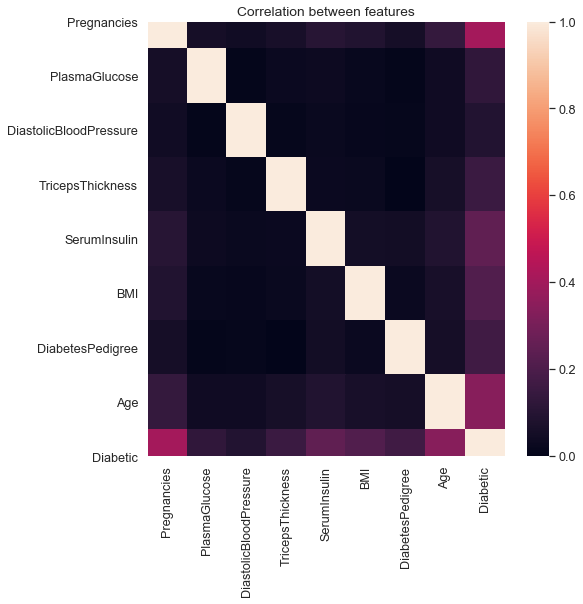

In [20]:
corr=diabetes_df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(8,8))

sns.heatmap(corr)                                                                                                                
plt.title('Correlation between features');                  

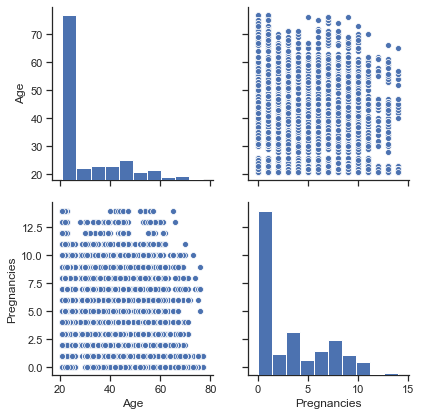

In [21]:
# Pair plots between age and pregnencies to check for any outliers

import seaborn as sns; sns.set(style="ticks", color_codes=True)

newplot= sns.pairplot(diabetes_df, height=3,
                 vars=["Age", "Pregnancies"])

In [22]:
# Ouliers removal with reference to pregnancies and age 

diabetes_df=diabetes_df[(diabetes_df['Pregnancies']<=4) & (diabetes_df["Age"]==21) | (diabetes_df['Pregnancies']<=5) & (diabetes_df["Age"]==22)
                 | (diabetes_df['Pregnancies']<=6) & (diabetes_df["Age"]==23)| (diabetes_df['Pregnancies']<=7) & (diabetes_df["Age"]==24)
                 | (diabetes_df['Pregnancies']<=8) & (diabetes_df["Age"]==25)| (diabetes_df['Pregnancies']<=9) & (diabetes_df["Age"]==26)
                 | (diabetes_df['Pregnancies']<=10) & (diabetes_df["Age"]==27)| (diabetes_df['Pregnancies']<=11) & (diabetes_df["Age"]==28)
                 | (diabetes_df['Pregnancies']<=12) & (diabetes_df["Age"]==29)| (diabetes_df['Pregnancies']<=13) & (diabetes_df["Age"]==30)
                 | (diabetes_df['Pregnancies']<=14) & (diabetes_df["Age"]==31) | (diabetes_df["Age"]>=32)]


In [23]:
print(diabetes_df.shape)

(12873, 9)


In [24]:
# Normalization

from sklearn.preprocessing import Normalizer

normalized_application = Normalizer().fit_transform(diabetes_df[['Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'SerumInsulin',
 'BMI',
 'DiabetesPedigree',
 'Age']])


In [25]:
normal_df=pd.DataFrame(normalized_application)

normal_df.columns=['Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'SerumInsulin',
 'BMI',
 'DiabetesPedigree',
 'Age']

In [26]:
normal_df['Diabetic'] = diabetes_df.Diabetic.values

In [27]:
# Data Partitioning

# Partitioning of our dataset is done by taking 80% as training data and remaining 20 % as test data 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from  sklearn import metrics

feature_names = ['Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'SerumInsulin',
 'BMI',
 'DiabetesPedigree',
 'Age']

predicted_name = ['Diabetic']

diabetes_feature = normal_df[feature_names].values 

diabetes_predicted = normal_df[predicted_name].values 

split_size = 0.20

feature_train,feature_test, pred_train,pred_test = train_test_split(diabetes_feature, diabetes_predicted, 
                                                                    test_size=split_size, random_state= 42) 
                            

In [28]:
# MODEL 1 : BASELINE MODEL

#Creating Gaussian NaiveBayes model object (BASELINE MODEL ) and training it with the dataset 

baseline_model =GaussianNB()

baseline_model.fit(feature_train, pred_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
prediction_from_trained_data = baseline_model.predict(feature_train)

In [30]:
# this code returns array of predicted results from test_data

prediction_from_test_data = baseline_model.predict(feature_test)

accuracy = metrics.accuracy_score(pred_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model on test data is: {0:0.4f}".format(accuracy))

GNB_accuracy=accuracy*100

Accuracy of our naive bayes model on test data is: 0.7542


In [31]:
print ("Confusion Matrix",'\n')

print ("{0}".format(metrics.confusion_matrix(pred_test, prediction_from_test_data, labels=[0,1])))

Confusion Matrix 

[[1422  294]
 [ 339  520]]


Confusion Matrix


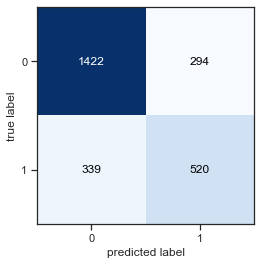

In [32]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print ("Confusion Matrix")

cm = confusion_matrix(pred_test, prediction_from_test_data)

fig = plot_confusion_matrix(cm)

plt.show()

In [33]:
# Sensitivity of MODEL 1

Naive_sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])

print("sensitivity of naive bayes=",Naive_sensitivity)

sensitivity of naive bayes= 0.6053550640279395


In [34]:
print ("Classification Report",'\n')

print ("{0}".format(metrics.classification_report(pred_test, prediction_from_test_data, labels=[1, 0])))

Classification Report 

              precision    recall  f1-score   support

           1       0.64      0.61      0.62       859
           0       0.81      0.83      0.82      1716

    accuracy                           0.75      2575
   macro avg       0.72      0.72      0.72      2575
weighted avg       0.75      0.75      0.75      2575



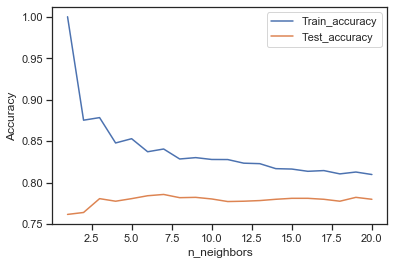

In [35]:
# MODEL 2 : K neareast neighbours (k-NN)

from sklearn.neighbors import KNeighborsClassifier


train_accuracy = []
test_accuracy = []


# try n_neighbors from 1 to 21

num_range = range(1, 21)
for n_nums in num_range:
    # To build the model
    knn = KNeighborsClassifier( n_neighbors=n_nums)
    knn.fit(feature_train, pred_train)
   
    train_accuracy.append(knn.score(feature_train, pred_train))
   
    test_accuracy.append(knn.score(feature_test, pred_test))
    
plt.plot(num_range, train_accuracy, label="Train_accuracy")
plt.plot(num_range, test_accuracy, label="Test_accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [36]:
# The above plot suggests that we should choose n_neighbors=7

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(feature_train, pred_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(feature_train, pred_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(feature_test, pred_test)))

KNN_accuracy=knn.score(feature_test, pred_test)*100

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.79


In [37]:
# Confusion matrix for MODEL 2

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

diabetes_actual =pred_test

diabetes_predicted =knn.predict(feature_test)

diabetes_results = confusion_matrix(diabetes_actual, diabetes_predicted)

print('Confusion Matrix','\n')

print(diabetes_results)

print('\n','Accuracy Score :', accuracy_score(diabetes_actual, diabetes_predicted))

print('Report')

print(classification_report(diabetes_actual, diabetes_predicted))

Confusion Matrix 

[[1504  212]
 [ 340  519]]

 Accuracy Score : 0.785631067961165
Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.84      1716
           1       0.71      0.60      0.65       859

    accuracy                           0.79      2575
   macro avg       0.76      0.74      0.75      2575
weighted avg       0.78      0.79      0.78      2575



In [38]:
# MODEL 3 : LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(random_state=48)
logit_model.fit(feature_train, pred_train.ravel())
logit_test = logit_model.predict(feature_test)

# Training metrics

print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(pred_test, logit_test)))

print ('\n',"Confusion Matrix")

print (metrics.confusion_matrix(pred_test, logit_test, labels=[1, 0]))

print ('\n',"Classification Report for Logistic regression")

print (metrics.classification_report(pred_test, logit_test, labels=[1, 0]))

LR_accuracy=metrics.accuracy_score(pred_test, logit_test)*100

Accuracy : 0.7305

 Confusion Matrix
[[ 289  570]
 [ 124 1592]]

 Classification Report for Logistic regression
              precision    recall  f1-score   support

           1       0.70      0.34      0.45       859
           0       0.74      0.93      0.82      1716

    accuracy                           0.73      2575
   macro avg       0.72      0.63      0.64      2575
weighted avg       0.72      0.73      0.70      2575



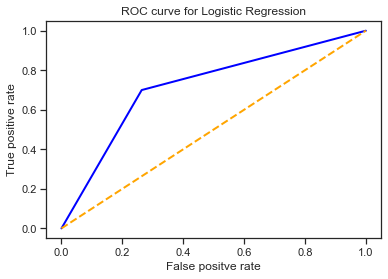

In [39]:
# Computing false and true positive rates

from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score

fpr, tpr,_=roc_curve(logit_model.predict(feature_test),pred_test,drop_intermediate=False)

plt.figure()

# Adding the ROC
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')

# Random FPR and TPR
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')

# Title and label

plt.xlabel('False positve rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Logistic Regression')
plt.show()

In [40]:
# AUC value for the above ROC curve

roc_auc_score(logit_model.predict(feature_test),pred_test)

0.7180565479456964

In [41]:
# MODEL 4 : DECISION TREE

from sklearn.tree import DecisionTreeClassifier

diabetes_tree = DecisionTreeClassifier(random_state=0)

diabetes_tree.fit(feature_train, pred_train)

diabetes_tree_test=diabetes_tree.predict(feature_test)

print("Accuracy on training set: {:.3f}".format(diabetes_tree.score(feature_train, pred_train)))

print("Accuracy on test set: {:.3f}".format(diabetes_tree.score(feature_test, pred_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.850


In [42]:
# As we can see that the training accuracy is 100%, the decision tree is overfitting. 
# Hence we need to prune the tree to avoid overfitting

diabetes_prune_tree = DecisionTreeClassifier(max_depth=4, random_state=0)

diabetes_prune_tree.fit(feature_train, pred_train)

print("Accuracy on training set: {:.3f}".format(diabetes_prune_tree.score(feature_train, pred_train)))

print("Accuracy on test set: {:.3f}".format(diabetes_prune_tree.score(feature_test, pred_test)))

Accuracy on training set: 0.851
Accuracy on test set: 0.857


In [43]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\nagay\\Anaconda3\\Library\\bin\\graphviz'

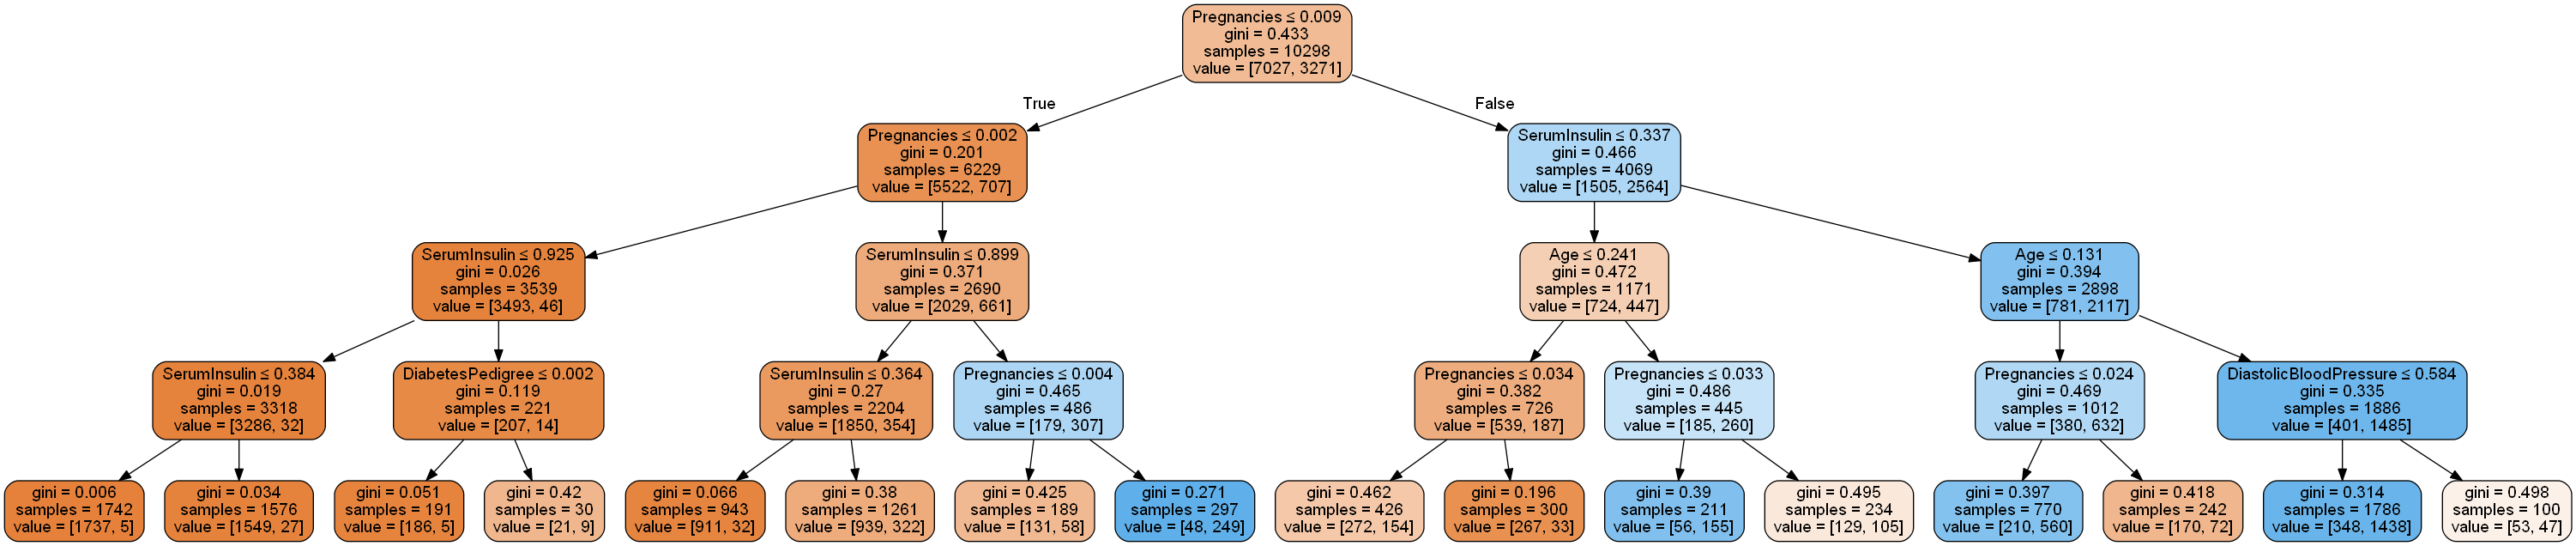

In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(diabetes_prune_tree, out_file=dot_data,  
                feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [45]:
from sklearn import metrics

print ("Confusion Matrix for Decision Tree Model")


print ("{0}".format(metrics.confusion_matrix(pred_test, diabetes_tree_test, labels=[1, 0])))


print ('\n',"Classification Report for Decision Tree Model \n")


print ("{0}".format(metrics.classification_report(pred_test, diabetes_tree_test, labels=[ 1,0])))

DR_accuracy=diabetes_prune_tree.score(feature_test, pred_test)*100

Confusion Matrix for Decision Tree Model
[[ 660  199]
 [ 187 1529]]

 Classification Report for Decision Tree Model 

              precision    recall  f1-score   support

           1       0.78      0.77      0.77       859
           0       0.88      0.89      0.89      1716

    accuracy                           0.85      2575
   macro avg       0.83      0.83      0.83      2575
weighted avg       0.85      0.85      0.85      2575



In [46]:
# MODEL 5 : RANDOM FOREST

# Building Random forest with default parameters

from sklearn.ensemble import RandomForestClassifier

diabetes_rf = RandomForestClassifier(n_estimators=100, random_state=0)
diabetes_rf.fit(feature_train, pred_train)

print("Accuracy on training set: {:.3f}".format(diabetes_rf.score(feature_train, pred_train)))

print("Accuracy on test set: {:.3f}".format(diabetes_rf.score(feature_test, pred_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.910


In [47]:
# As we can see that the training accuracy is 100%, the decision tree is overfitting. 
# Hence we need to prune the tree to avoid overfitting


diabetes_prune_rf1 = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=0)

diabetes_prune_rf1.fit(feature_train, pred_train)

print("Accuracy on training set: {:.3f}".format(diabetes_prune_rf1.score(feature_train, pred_train)))

print("Accuracy on test set: {:.3f}".format(diabetes_prune_rf1.score(feature_test, pred_test)))

RF_accuracy=diabetes_prune_rf1.score(feature_test, pred_test)*100

Accuracy on training set: 0.923
Accuracy on test set: 0.903


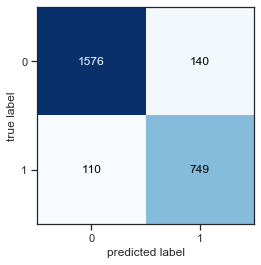

In [48]:
# Confusion matrix for RANDOM FOREST

from mlxtend.plotting import plot_confusion_matrix

rf_matrix=confusion_matrix(pred_test,diabetes_prune_rf1.predict(feature_test))

fig, ax = plot_confusion_matrix(conf_mat=rf_matrix)

plt.show()

In [49]:
# SENSITIVITY for random forest

RF_sensitivity = float(rf_matrix[1,1]/(rf_matrix[1,0]+rf_matrix[1,1]))

print("sensitivity of RF=",RF_sensitivity)

sensitivity of RF= 0.8719441210710128


In [50]:
# MODEL 6 : Artificail Neural Network

In [51]:
from numpy.random import seed
seed(42)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
print(tf.__version__)

1.13.2


In [52]:
diabetes_df.shape[0]

12873

In [53]:
diabetes_df.head(5)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
5,0,82,92,9,253,19.724160,0.103424,26,0
6,0,133,47,19,227,21.941357,0.174160,21,0


In [54]:
def preprocess_features(diabetes_df):
  """Prepares input features from default of credit card clients data set.

  Args:
    diabetes_df: A Pandas DataFrame expected to contain data
      from the default of credit card clients dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = diabetes_df[
    ["Pregnancies",
     "PlasmaGlucose",
     "DiastolicBloodPressure",
     "TricepsThickness",
     "SerumInsulin",
     "BMI",
     "DiabetesPedigree",
     "Age"]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(diabetes_df):
  """Prepares target features (i.e., labels) from data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = diabetes_df["Diabetic"]
  return output_targets

In [55]:
# partitioning the dataset into training (80%) and validation / test (20%) datasets

tr_size=int(0.8*(len(diabetes_df)))
print(tr_size)

val_size=(len(diabetes_df)-tr_size)
print(val_size)

10298
2575


In [56]:
# Choose 80% features for training

training_examples = preprocess_features(diabetes_df.head(tr_size))
training_targets = preprocess_targets(diabetes_df.head(tr_size))
scaler = StandardScaler().fit(training_examples.values) # Normalizing the data
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose the 20% features for validation

validation_examples = preprocess_features(diabetes_df.tail(val_size))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(diabetes_df.tail(val_size))


print("Training examples summary:")
display.display(training_examples.describe())

print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())

print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,1.029800e+04,1.029800e+04,1.029800e+04,1.029800e+04,1.029800e+04,1.029800e+04,1.029800e+04,1.029800e+04
mean,5.290971e-16,4.316695e-17,6.540241e-16,-1.645174e-17,5.644370e-17,-4.221459e-16,-1.093674e-16,-1.265145e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-8.384461e-01,-1.987551e+00,-2.797524e+00,-1.504866e+00,-9.275226e-01,-1.351066e+00,-8.502711e-01,-8.346734e-01
25%,-8.384461e-01,-7.392004e-01,-8.338972e-01,-9.536592e-01,-7.467136e-01,-1.046224e+00,-6.933637e-01,-7.549099e-01
50%,-4.952970e-01,-1.150251e-01,-8.436161e-04,1.487544e-01,-4.076967e-01,2.994694e-02,-5.253851e-01,-5.156197e-01
75%,5.341504e-01,6.651940e-01,8.322100e-01,8.377629e-01,4.285450e-01,8.004605e-01,5.785610e-01,6.808317e-01
max,3.965642e+00,2.631346e+00,2.736332e+00,4.351706e+00,4.986439e+00,2.512828e+00,4.996289e+00,3.632079e+00


Validation examples summary:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,-0.029281,0.009689,0.046020,-0.013236,-0.008735,-0.000968,-0.025121,0.004964
std,0.967879,1.005082,1.000993,1.005298,0.990185,0.990060,0.967624,1.004355
min,-0.838446,-1.987551,-2.797524,-1.504866,-0.927523,-1.351136,-0.850239,-0.834673
25%,-0.838446,-0.739200,-0.714890,-0.953659,-0.739180,-1.039084,-0.690090,-0.754910
50%,-0.495297,-0.115025,0.177668,0.010953,-0.437832,0.017149,-0.536257,-0.515620
75%,0.534150,0.665194,0.832210,0.837763,0.443612,0.776025,0.512389,0.680832
max,3.965642,2.568929,2.676829,4.420607,4.941236,2.506770,4.934371,3.552315


Training targets summary:


count    10298.000000
mean         0.322101
std          0.467304
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Diabetic, dtype: float64

Validation targets summary:


count    2575.000000
mean        0.315728
std         0.464895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Diabetic, dtype: float64

In [57]:
# Displaying the number of rows and coulmns in training data

training_examples.shape

(10298, 8)

In [58]:
training_targets.shape

(10298,)

In [59]:
training_examples.head(5)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,-0.838446,1.975962,0.534691,0.355457,-0.859719,1.233671,2.134464,-0.834673
3,2.249896,-0.146234,0.415683,-0.264651,1.257253,-0.188735,2.317675,0.920122
4,-0.495297,-0.707992,-0.714890,-0.126849,-0.769315,1.141225,0.389477,-0.754910
5,-0.838446,-0.801618,1.248737,-1.367064,0.873034,-1.195527,-0.783536,-0.435856
6,-0.838446,0.790029,-1.428935,-0.678056,0.677157,-0.969087,-0.597546,-0.834673


In [60]:
# Accuracy for the baseline model specific to neural nets
max(pd.value_counts(diabetes_df['Diabetic']))*100/(len(diabetes_df['Diabetic']))

67.9173463839043

In [61]:
# Model building

diabetic_model1 = keras.Sequential([
    keras.layers.Dense(17, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),                
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
 ])

diabetic_model1.compile(loss='binary_crossentropy',      
                optimizer="rmsprop",
                metrics=['binary_accuracy'])
diabetic_model1.summary() 

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                153       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 18        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [62]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
diabetic_history = diabetic_model1.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................

In [63]:
# Downloading the model to local drive

diabetic_model1.save("diabetic_model.h5")
print("Saved model to disk")

Saved model to disk


In [64]:
# Accuracy of ANN model

ANN_accuracy=(max(diabetic_history.history['val_binary_accuracy']))*100

print(ANN_accuracy)

91.72815680503845


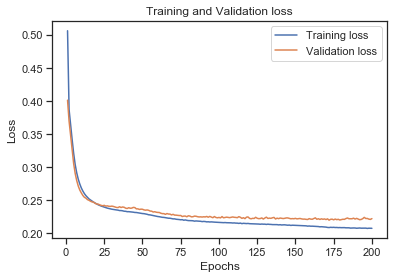

In [65]:
# Loss plot

acc = diabetic_history.history['binary_accuracy']
val_acc = diabetic_history.history['val_binary_accuracy']

loss = diabetic_history.history['loss']
val_loss = diabetic_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

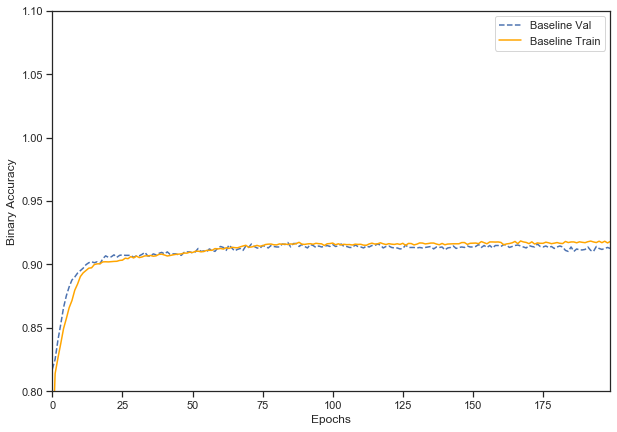

In [66]:
# Accuracy plot

def plot_history(histories, key='binary_accuracy'):
    plt.figure(figsize=(10,7))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color='orange',
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0.8,1.1])

plot_history([('baseline', diabetic_history)])

In [67]:
Y_pred = np.round(diabetic_model1.predict(validation_examples))

Confusion Matrix


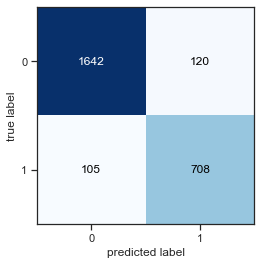

sensitivity of ANN= 0.8708487084870848


In [68]:
# Confusion matrix for ANN

from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix")

cm = confusion_matrix(validation_targets, Y_pred)

fig = plot_confusion_matrix(cm)

plt.show()

# SENSITIVITY for ANN

ANN_sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])

print("sensitivity of ANN=",ANN_sensitivity)

In [69]:
# Dataframe for each accuracy measure of the above models

accuracy_measures=pd.DataFrame({'Models Developed':["NaiveBayes","KNN","Logit","DT","RF","ANN"],
                              'Model Accuracy':[GNB_accuracy,KNN_accuracy,LR_accuracy,DR_accuracy,RF_accuracy,ANN_accuracy]})

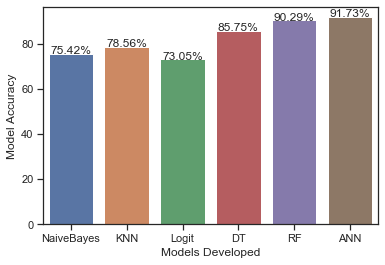

In [70]:
# Plotting the accuracy scores of above models using sea born package

axis = sns.barplot(x = 'Models Developed', y = 'Model Accuracy', data = accuracy_measures)

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.09, '{:1.2f}%'.format(height), ha="center") 
    
plt.show()